In [1]:
import pandas as pd
import numpy as np 


In [2]:
datalines = pd.read_csv('C:/Users/katin/Desktop/assignment-Ankita mandal/archive/movie_lines.tsv', sep='\t', error_bad_lines=False,
                       warn_bad_lines=False, header=None)


'''TSV file stands for tab-separated values file. It is a text file that stores data in a tabular form'''
#sep() function is used to use space between two lines and \t is used to add a tab in case of tsv file
'''We can either skip the data (with outputs) by setting error_bad_lines to False when it goes into a crisis mode
and can neglect the error with warn_bad_lines and the error will not be printed'''

#We can either skip the data (with outputs) by setting error_bad_lines to False

datacharacters = pd.read_csv('C:/Users/katin/Desktop/assignment-Ankita mandal/archive/movie_characters_metadata.tsv', sep='\t',error_bad_lines=False, warn_bad_lines=False,
                             header=None)

datalines.head()
datacharacters.head()


,0,1,2,3,4,5
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [3]:
datacharacters.columns=['charid','charname','movieid','moviename','gender','postcredits']
datacharacters.head()

,charid,charname,movieid,moviename,gender,postcredits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [4]:
'''shape:
NumPy arrays have an attribute called shape that returns a tuple with each index having the number of corresponding elements.
Example: 
>>>import numpy as np

>>>arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

>>>print(arr.shape)

Output: (2,4)
'''
datacharacters.shape



(9034, 6)

In [5]:
datacharacters.gender.value_counts() 
#value_counts() is used to calculate the number of unique values, here it is used to count the values of gender

?    6008
m    1899
f     921
M     145
F      44
Name: gender, dtype: int64

In [6]:
#remove the characters containing '?' mark from dataset
datacharacters = datacharacters[datacharacters.gender != '?'] 
#assign label 
datacharacters.gender = datacharacters.gender.apply(lambda g: 0 if g in ['m', 'M'] else 1)  
'''Lambda:
It is a small anonymous function which can take any number of arguments, but can only have one expression. 
It is used when anonymous function is required for a short period of time.

Syntax
lambda arguments : expression
'''
datacharacters.shape

(3026, 6)

In [7]:
#number of male and female
datacharacters.gender.value_counts()

0    2044
1     982
Name: gender, dtype: int64

In [8]:
#name the columns
datalines.columns = ['lineid','charid','movieid','charname','dialogue']
datalines.head()

,lineid,charid,movieid,charname,dialogue
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [9]:
# Now we will add datalines and datacharacters together 
dataset = pd.merge(datalines, datacharacters, how='inner', on=['charid','movieid', 'charname'], # how='inner' refers to the type of join# 
          sort=True,
         copy=False)
dataset.head()


,lineid,charid,movieid,charname,dialogue,moviename,gender,postcredits
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,1,4
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,1,4
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,1,4
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,1,4
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,1,4


In [10]:
#Remove empty dialogues from the dataset
dataset = dataset[dataset['dialogue'].notnull()] 



In [11]:
dataset['line_Length'] = dataset.dialogue.str.len()             ## Length of each line by characters
dataset['wordinLine'] = dataset.dialogue.str.count(' ') + 1    ## Length of each line by words


In [12]:

import re #It is used to work with regular expression

'''
NLTK (Natural Language Toolkit) is a suite that contains libraries and programs for statistical language processing.
we can access stopwords via the NLTK corpus with: from nltk.corpus import stopwords.'''

from nltk.corpus import stopwords

'''Lemmatization is the process of grouping together the different inflected forms 
of a word so that they can be analysed as a single item'''

from nltk.stem import WordNetLemmatizer


wordnet_lemmatizer = WordNetLemmatizer()
def cleandialogue( dialogue ):
    # tarnsform every word into small letters      
    letters = re.sub("[^a-zA-Z]", " ", dialogue) 
    
    words = letters.lower().split()                             
    
    # define stopwords
    stops = set(stopwords.words("english"))   
    
    # Use lemmatization and remove stopwords
    meaningfulwords = [wordnet_lemmatizer.lemmatize(w) for w in words if not w in stops]   
    
    return( " ".join( meaningfulwords ))
# cleaning the dataset after creating stopwords
dataset['cleandialogue'] = dataset['dialogue'].apply(cleandialogue)
dataset[['dialogue','cleandialogue']].sample(5)

,dialogue,cleandialogue
76735,God well don't let him go! Catch him!,god well let go catch
150054,Don't spend all day down there.,spend day
45073,Suppose you knew that you had to do something ...,suppose knew something dangerous prove somethi...
199199,Are you happy Zaltar?,happy zaltar
75505,--almost a year before he left the Justice Dep...,almost year left justice department


In [13]:
import IPython
from IPython.display import display
import graphviz
# from sklearn.tree import export_graphviz
#now we will train our sample data 
train = dataset.groupby(['charid', 'movieid', 'charname', 'gender']). \
            agg({'line_Length' : ['median'],  ##Dataframe.aggregate() function is used to apply some aggregation across one or more column.##
                 'wordinLine' : ['median'],
                 'charid' : ['count'],
                 'cleandialogue' : [lambda x : ' '.join(x)] 
                })
'''
                 The join() method provides a flexible way to create strings from iterable objects. 
                 It joins each element of an iterable (such as list, string, and tuple)
                 
                 '''

## Renaming columns by aggregate functions
train.columns = ["_".join(x) for x in train.columns.ravel()]

'''numpy.ravel() is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array'''
'''There are two states of inplace, True and False. Bydefault it is False, when it is true, the data is modified in place,
which means it will return nothing and the dataframe is now updated.'''
train.reset_index(inplace=True)
train



<ipython-input-13-0a8530b2ff52>:19: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  train.columns = ["_".join(x) for x in train.columns.ravel()]


,charid,movieid,charname,gender,line_Length_median,wordinLine_median,charid_count,cleandialogue_<lambda>
0,u0,m0,BIANCA,1,34.0,7.0,94,hope let go okay gonna need learn lie like fe...
1,u100,m6,AMY,1,23.0,4.0,31,died sleep three day ago paper tom dead calli...
2,u1003,m65,RICHARD,0,24.5,5.0,70,asked would said room room serious foolin arou...
3,u1005,m65,SETH,0,37.0,8.0,163,let follow said new jesus christ carlos brothe...
4,u1008,m66,C.O.,0,48.0,9.0,33,course uh v p security arrangement generally t...
...,...,...,...,...,...,...,...,...
2946,u980,m63,VICTOR,0,32.0,6.0,126,never said name remembers kill draw line take...
2947,u983,m64,ALICE,1,30.0,6.0,51,maybe wait mr christy killer still bill bill b...
2948,u985,m64,BILL,0,20.0,4.0,39,twenty mile crossroad steve back hour thing st...
2949,u997,m65,JACOB,0,36.0,6.0,90,meant son daughter oh daughter bathroom vacati...


In [14]:
## Separating labels from features
y = train['gender'] # training the test data
X = train.copy()  #copy() gives you a copy with different memory allocation. label = train only gives you an alias, that is, same memory



In [15]:
## Removing unnecessary columns
X.drop('charid', axis=1, inplace=True)
X.drop('movieid', axis=1, inplace=True)
X.drop('charname', axis=1, inplace=True)
X.head()

,gender,line_Length_median,wordinLine_median,charid_count,cleandialogue_<lambda>
0,1,34.0,7.0,94,hope let go okay gonna need learn lie like fe...
1,1,23.0,4.0,31,died sleep three day ago paper tom dead calli...
2,0,24.5,5.0,70,asked would said room room serious foolin arou...
3,0,37.0,8.0,163,let follow said new jesus christ carlos brothe...
4,0,48.0,9.0,33,course uh v p security arrangement generally t...


In [16]:
# we will take equeal number on male and female for avoiding any biasness
from imblearn.under_sampling import RandomUnderSampler
#take the sample as a random number for the majority class
undersample = RandomUnderSampler(sampling_strategy='majority')
 
X_under, y_under = undersample.fit_resample(X, y)
y_under.value_counts()

0    948
1    948
Name: gender, dtype: int64

In [17]:
# we will take equal records for validation dta also
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_under, y_under, test_size=0.2, random_state =10, stratify=y_under)

y_val.value_counts()

0    190
1    190
Name: gender, dtype: int64

In [18]:
# Since our dataset includes both numerical features & NLP tokens, we’ll use a special converter class in our pipeline.
from sklearn.pipeline import  Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
class Converter(BaseEstimator, TransformerMixin):
        def fit(self, x, y=None):
            return self

        def transform(self, newdataset):
            return newdataset.values.ravel()

In [19]:
#we will transform the lines into a vector for pipeline classifier

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
vectorizer_features = ['cleandialogue_<lambda>'] ##we define vector feature
vectorizer_transformer = Pipeline(steps=[
    ('con', Converter()),
    ('tf', TfidfVectorizer())]) #transformation into vactor_features

In [20]:
#Neumeri features for pipeline
from sklearn.preprocessing import MinMaxScaler
numeric_features = ['line_Length_median', 'wordinLine_median', 'charid_count'] ## we define numeric features

numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())]) #we transform into numeric features

In [21]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.compose import ColumnTransformer

#here we will use logistic regression
from sklearn.linear_model import LogisticRegression
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
       
        ('vec', vectorizer_transformer, vectorizer_features)
    ])

                   

logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])




In [22]:
# Fitting the preprocessing & classifier pipelines on training data
logreg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['line_Length_median',
                                                   'wordinLine_median',
                                                   'charid_count']),
                                                 ('vec',
                                                  Pipeline(steps=[('con',
                                                                   Converter()),
                                                                  ('tf',
                                                                   TfidfVectorizer())]),
                                                  ['cleandialogue_<lambda>'])])),
                ('classifier', LogisticRegression())])

In [23]:
import matplotlib.pyplot as plt #used to create graph
import seaborn as sns #used to create visualization, design of graph
from sklearn.metrics import classification_report, confusion_matrix



def results(name: str, model: BaseEstimator) -> None:
    '''
    Custom function to check model performance on validation set
    '''
    preds = model.predict(X_val)

    print(name + " score: %.3f" % model.score(X_val, y_val))
    print(classification_report(y_val, preds))
    labels = ['Male', 'Female']
# crete confusion matrix plot 
    conf_matrix = confusion_matrix(y_val, preds)
    plt.figure(figsize= (10,5))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, cmap='Blues',  annot=False)
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

Logistic Regression score: 0.724
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       190
           1       0.71      0.75      0.73       190

    accuracy                           0.72       380
   macro avg       0.72      0.72      0.72       380
weighted avg       0.72      0.72      0.72       380



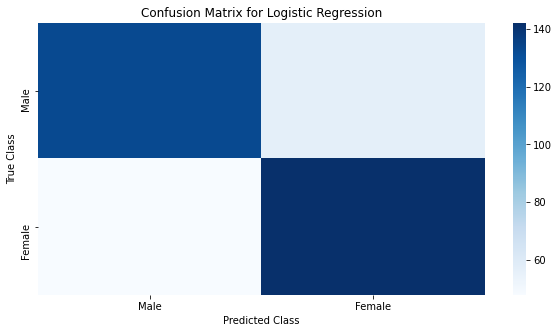

In [24]:

#returns a probability score of each observation
results("Logistic Regression" , logreg)
